In [1]:
import numpy as np
import pandas as pd

## Importing Dataset

In [2]:
data=pd.read_csv('transaction.csv')

In [8]:
data.shape

(590540, 394)

In [90]:
data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
data.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


## Exploratory Data Analysis

In [93]:
data.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

In [94]:
data.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='isFraud', ylabel='Density'>

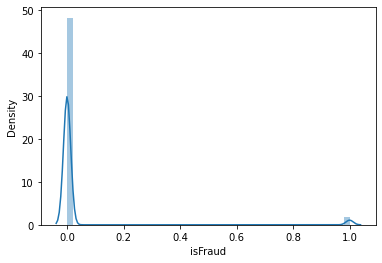

In [96]:
cnt_graph=sns.distplot(data['isFraud'])
cnt_graph

In [97]:
print("Skewness : %f" % data["isFraud"].skew())
print("Kurtosis : %f" % data["isFraud"].kurt())

Skewness : 5.061223
Kurtosis : 23.616056


In [98]:
data.corr()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,1.000000,0.014166,0.998280,0.012025,0.010122,-0.019900,-0.010091,-0.023900,-0.000370,0.057213,...,0.250831,0.199285,0.219190,0.223816,0.005893,0.179740,0.103030,0.074034,0.203922,0.162702
isFraud,0.014166,1.000000,0.013103,0.011320,-0.013640,0.003388,0.154151,-0.033580,0.005596,-0.030387,...,-0.021164,-0.021982,-0.023468,-0.024134,-0.000451,-0.005456,-0.002402,-0.005702,-0.019356,-0.014663
TransactionDT,0.998280,0.013103,1.000000,0.011920,0.010625,-0.019202,-0.011222,-0.024132,-0.000051,0.051972,...,0.258603,0.205671,0.226312,0.231072,0.005762,0.184407,0.105783,0.075892,0.210240,0.167524
TransactionAmt,0.012025,0.011320,0.011920,1.000000,-0.005725,0.016136,-0.109785,0.003061,-0.007421,0.028312,...,0.003909,0.024319,0.010808,0.017385,0.078751,0.044830,0.070651,0.129452,0.082064,0.105996
card1,0.010122,-0.013640,0.010625,-0.005725,1.000000,0.004960,0.002965,-0.093633,0.020369,-0.000060,...,0.146483,0.121763,0.133150,0.136557,-0.001903,0.080603,0.050555,0.036052,0.118885,0.091271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V335,0.179740,-0.005456,0.184407,0.044830,0.080603,0.044073,0.000465,-0.209817,0.029812,0.006035,...,0.647561,0.593782,0.647208,0.657350,0.703988,1.000000,0.914130,0.166021,0.552533,0.411911
V336,0.103030,-0.002402,0.105783,0.070651,0.050555,0.029899,-0.001279,-0.139576,0.019343,0.004541,...,0.412448,0.389508,0.410970,0.425812,0.906312,0.914130,1.000000,0.118221,0.353950,0.274392
V337,0.074034,-0.005702,0.075892,0.129452,0.036052,0.017705,0.001361,-0.076374,0.011272,0.001554,...,0.245626,0.309989,0.259108,0.295698,0.041888,0.166021,0.118221,1.000000,0.742652,0.907378
V338,0.203922,-0.019356,0.210240,0.082064,0.118885,0.055566,0.001970,-0.233342,0.034816,0.003999,...,0.780555,0.752075,0.800310,0.823754,0.054911,0.552533,0.353950,0.742652,1.000000,0.940009


In [4]:
data['ProductCD'].value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

Unique value of W is higher than other type

<AxesSubplot:xlabel='ProductCD', ylabel='isFraud'>

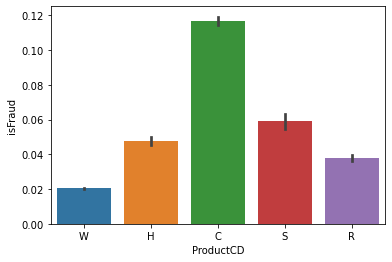

In [7]:
sns.barplot(x='ProductCD',y='isFraud',data=data)

Product C has more fraudulent record

<AxesSubplot:xlabel='card4', ylabel='isFraud'>

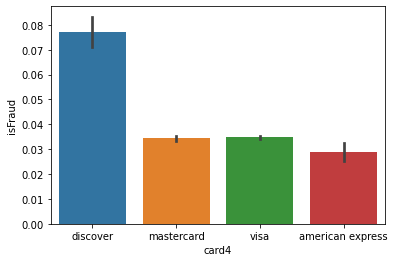

In [8]:
sns.barplot(data=data,y='isFraud',x='card4')

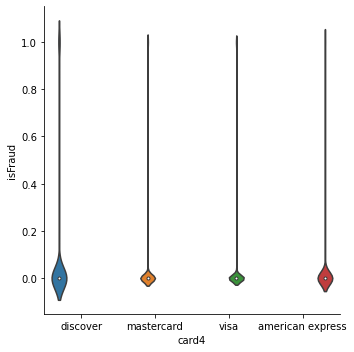

In [9]:
sns.catplot(data=data,x='card4',y='isFraud',kind='violin',hue='card4')

Discover card type has highest fraudulent record

<AxesSubplot:xlabel='card6', ylabel='isFraud'>

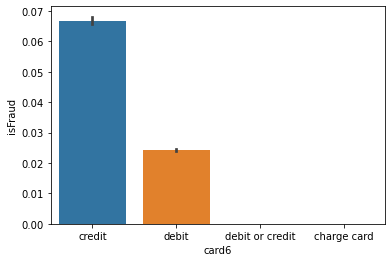

In [10]:
sns.barplot(data=data,y='isFraud',x='card6')

Credit card has more fraudulent record

In [11]:
data.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

In [9]:
data1=data.dropna(thresh=data.shape[0]*0.6,how='all',axis=1) ## We first drop all columns with more than 60% missing data

In [10]:
data1.shape

(590540, 202)

In [11]:
def corr_ratio(categories, values):
    cat = pd.factorize(categories)[0]
    values = np.array(values)
    
    ssw = 0
    ssb = 0
    for i in np.unique(cat):
        subgroup = values[np.argwhere(cat == i).flatten()]
        ssw += np.sum((subgroup-np.mean(subgroup))**2)
        ssb += len(subgroup)*(np.mean(subgroup)-np.mean(values))**2

    return (ssb / (ssb + ssw))**.5

In [12]:
coef1 = corr_ratio(data['P_emaildomain'], data['isFraud'])
print('Eta_squared: {:.4f}\nEta: {:.4f} \n'.format(coef1**2, coef1))

Eta_squared: 0.0063
Eta: 0.0791 



In [13]:
coef1 = corr_ratio(data['card4'], data['isFraud'])
print('Eta_squared: {:.4f}\nEta: {:.4f} \n'.format(coef1**2, coef1))

Eta_squared: 0.0006
Eta: 0.0250 



In [14]:
coef1 = corr_ratio(data['card6'], data['isFraud'])
print('Eta_squared: {:.4f}\nEta: {:.4f} \n'.format(coef1**2, coef1))

Eta_squared: 0.0101
Eta: 0.1005 



In [15]:
coef1 = corr_ratio(data['ProductCD'], data['isFraud'])
print('Eta_squared: {:.4f}\nEta: {:.4f} \n'.format(coef1**2, coef1))

Eta_squared: 0.0284
Eta: 0.1684 



In [16]:
coef1 = corr_ratio(data['M6'], data['isFraud'])
print('Eta_squared: {:.4f}\nEta: {:.4f} \n'.format(coef1**2, coef1))

Eta_squared: 0.0154
Eta: 0.1241 



## Pre-processing Activities

In [17]:
v_data = data1.loc[:,'V12':'V321']

In [18]:
nv = data1.loc[:,'TransactionID':'M6']

In [19]:
from sklearn import preprocessing

In [20]:
onehat_encoder = preprocessing.OneHotEncoder(sparse=False)
label_encoder = preprocessing.LabelEncoder()

In [21]:
encoded_ProductCD = pd.DataFrame(onehat_encoder.fit_transform(nv['ProductCD'].ravel().reshape(-1,1)))

In [22]:
nv['card4'].replace({'visa':0,'mastercard':1,'american express':2,'discover':3},inplace = True)

In [23]:
nv['card6'].replace({'debit':0,'credit':1,'debit or credit':2,'charge card':3},inplace = True)

In [24]:
nv['M6'].replace({'F':0,'T':1},inplace = True)

In [25]:
nv_drop = nv.drop(['ProductCD','TransactionID','isFraud','P_emaildomain'],axis=1)

In [26]:
final = pd.concat([encoded_ProductCD.reset_index(drop=True),nv_drop.reset_index(drop=True),v_data.reset_index(drop=True)],axis=1)

In [27]:
final.head()

,0,1,2,3,4,TransactionDT,TransactionAmt,card1,card2,card3,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,0.0,0.0,0.0,0.0,1.0,86400,68.5,13926,NaN,150.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,86401,29.0,2755,404.0,150.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,86469,59.0,4663,490.0,150.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,86499,50.0,18132,567.0,150.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,86506,50.0,4497,514.0,150.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Missing value imputation with KNN

In [28]:
final.to_csv('final_items.csv',index = False)

In [29]:
import math
fchunk = pd.read_csv('final_items.csv',chunksize = 1000)
i=0
for chunk in fchunk:
    from sklearn.impute import KNNImputer
    imputer = KNNImputer()
    imputer.fit(chunk)
    if(i==0):
        f_Xtrans = pd.DataFrame(imputer.transform(chunk))
    elif(i>0):
        frames = [f_Xtrans,pd.DataFrame(imputer.transform(chunk))]
        f_Xtrans = pd.concat(frames,ignore_index = True)
    i = i+1

In [30]:
f_Xtrans = f_Xtrans.astype(int)

In [31]:
f_Xtrans.head()

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,200,201,202
0,0,0,0,0,1,86400,68,13926,379,150,...,0,0,0,0,0,117,0,0,0,0
1,0,0,0,0,1,86401,29,2755,404,150,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,86469,59,4663,490,150,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,86499,50,18132,567,150,...,135,0,0,0,50,1404,790,0,0,0
4,0,1,0,0,0,86506,50,4497,514,150,...,0,0,0,0,0,0,0,0,0,0


In [32]:
encoded_card4 = pd.DataFrame(onehat_encoder.fit_transform(f_Xtrans.iloc[:,10].ravel().reshape(-1,1)))
encoded_card6 = pd.DataFrame(onehat_encoder.fit_transform(f_Xtrans.iloc[:,12].ravel().reshape(-1,1)))

In [33]:
f_Xtrans.drop([10,12], axis=1, inplace=True)

In [34]:
f_Xtrans.head()

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,200,201,202
0,0,0,0,0,1,86400,68,13926,379,150,...,0,0,0,0,0,117,0,0,0,0
1,0,0,0,0,1,86401,29,2755,404,150,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,86469,59,4663,490,150,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,86499,50,18132,567,150,...,135,0,0,0,50,1404,790,0,0,0
4,0,1,0,0,0,86506,50,4497,514,150,...,0,0,0,0,0,0,0,0,0,0


In [43]:
f_Xtrans = pd.concat([encoded_card6.reset_index(drop=True),f_Xtrans.reset_index(drop=True)],axis=1)

In [47]:
y = data['isFraud']

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [50]:
x_scale=sc.fit_transform(f_Xtrans)

In [54]:
x_scale.shape

(590540, 205)

## Dimensionality reduction using PCA

In [55]:
from sklearn.decomposition import PCA
pca=PCA(n_components=60)
x_scale=pca.fit_transform(x_scale)

In [56]:
x_scale.shape

(590540, 60)

In [57]:
x = x_scale

In [58]:
del x_scale

## Splitting In Train and Test dataset

In [60]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## Balancing the imbalance dataset

In [12]:
from imblearn.under_sampling import NearMiss

In [62]:
from imblearn.under_sampling import TomekLinks

In [63]:
x.shape

(590540, 60)

In [66]:
x_train, y_train = TomekLinks().fit_resample(x_train,y_train)
print(x_train.shape)
print(y_train.shape)

(27816, 60)
(27816,)


In [65]:
x_train, y_train = NearMiss(version=3, n_neighbors_ver3=3).fit_resample(x_train,y_train)
print(x_train.shape)
print(y_train.shape)

(28720, 60)
(28720,)


In [67]:
from imblearn.under_sampling import OneSidedSelection
print(x_train.shape)
print(y_train.shape)

(27816, 60)
(27816,)


In [68]:
x_train, y_train = OneSidedSelection(n_neighbors=1, n_seeds_S=200).fit_resample(x_train,y_train)

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
x_train, y_train = SMOTE().fit_resample(x_train,y_train)

In [71]:
print(x_train.shape)
print(y_train.shape)

(27460, 60)
(27460,)


In [72]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

In [73]:
x_train, y_train = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5).fit_resample(x_train,y_train)
print(x_train.shape)
print(y_train.shape)

(24019, 60)
(24019,)


In [74]:
from imblearn.over_sampling import ADASYN

In [75]:
x_train, y_train = ADASYN().fit_resample(x_train,y_train)

In [76]:
print(x_train.shape)
print(y_train.shape)

(26449, 60)
(26449,)


In [77]:
from imblearn.over_sampling import BorderlineSMOTE

In [78]:
x_train, y_train = BorderlineSMOTE().fit_resample(x_train,y_train)
print(x_train.shape)
print(y_train.shape)

(27460, 60)
(27460,)


In [79]:
from imblearn.over_sampling import SVMSMOTE

In [80]:
x_train, y_train = SVMSMOTE().fit_resample(x_train,y_train)
print(x_train.shape)
print(y_train.shape)

(27460, 60)
(27460,)


In [86]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [87]:
x_train, y_train = CondensedNearestNeighbour(n_neighbors=1).fit_resample(x_train,y_train)
print(x_train.shape)
print(y_train.shape)

(7998, 60)
(7998,)


In [58]:
from imblearn.combine import SMOTETomek

In [59]:
x_train, y_train = SMOTETomek().fit_resample(x_train,y_train)
print(x_train.shape)
print(y_train.shape)

(796816, 60)
(796816,)


## Modelling Part

In [60]:
log_model = linear_model.LogisticRegression()

In [61]:
log_model.fit(x_train,y_train)

C:\Users\hdar0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
log_model.score(x_train,y_train)

0.7347806770948374

In [63]:
log_model.score(x_test,y_test)

0.7321095946083246

In [64]:
y_pred=log_model.predict(x_test)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print('accuracy %s' % accuracy_score(y_test, y_pred))

accuracy 0.7321095946083246


In [66]:
cm

array([[125222,  45820],
       [  1640,   4480]], dtype=int64)

In [67]:
from xgboost import XGBClassifier

In [68]:
default = XGBClassifier()

In [69]:
default.fit(x_train,y_train)

C:\Users\hdar0\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:34:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
default.score(x_train,y_train)

0.8939629726310717

In [71]:
default.score(x_test,y_test)

0.8847777740147436

In [72]:
y_pred=default.predict(x_test)

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print('accuracy %s' % accuracy_score(y_test, y_pred))

accuracy 0.8847777740147436


In [74]:
cm

array([[152429,  18613],
       [  1800,   4320]], dtype=int64)

In [89]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [90]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [91]:
print('No Skill: ROC AUC=%f' % (ns_auc))
print('XGBoost: ROC AUC=%f' % (lr_auc))

No Skill: ROC AUC=0.500000
XGBoost: ROC AUC=0.877341


In [92]:
from sklearn.metrics import f1_score

In [93]:
f1_score(y_test, y_pred, average='micro')

0.5656066199297818